In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical

from keras.models import Sequential

from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

from google.colab import drive
drive.mount('/content/gdrive')

data = []
labels = []
classes = 43
cur_path = '/content/gdrive/MyDrive/ML Mini Project/TrafficDataset'
for i in range(classes):
  path = os.path.join(cur_path,'Train', str(i))
  images = os.listdir(path)
  for a in images:
     try:
       image = Image.open(path + '/'+ a)
       image = image.resize((30,30))
       image = np.array(image)
       data.append(image)
       labels.append(i)
     except:
       print("Error loading image")
data = np.array(data)
labels = np.array(labels)
# print(labels)

Mounted at /content/gdrive


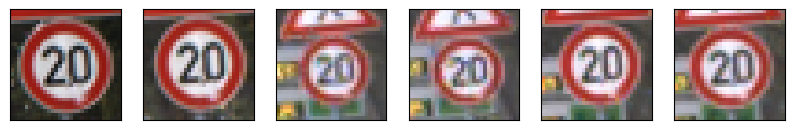

In [ ]:
# create a figure and axes object
fig, axs = plt.subplots(1, 6, figsize=(10, 5))

# display each image in a different subplot
for i in range(6):
  axs[i].imshow(data[i])


# remove the axis ticks and labels
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

# display the plot
plt.show()

In [ ]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
print(X_train.shape[1:])

(39208, 30, 30, 3) (39208,)
(31366, 30, 30, 3) (7842, 30, 30, 3) (31366,) (7842,)
(30, 30, 3)


In [ ]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [ ]:
# !pip install visualkeras
# !pip install ann_visualizer
# !pip install graphviz

In [ ]:
# from ann_visualizer.visualize import ann_viz
# ann_viz(model, view=True, filename='VisualisationOfTrafficSignsCNN', title='CNN for Traffic Sign Recognition')

In [ ]:
eps = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=eps, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 27s 10ms/step - loss: 1.8359 - accuracy: 0.5212 - val_loss: 0.6750 - val_accuracy: 0.8426
Epoch 2/15
981/981 [==============================] - 9s 9ms/step - loss: 0.5910 - accuracy: 0.8283 - val_loss: 0.1966 - val_accuracy: 0.9447
Epoch 3/15
981/981 [==============================] - 11s 11ms/step - loss: 0.3664 - accuracy: 0.8950 - val_loss: 0.1104 - val_accuracy: 0.9668
Epoch 4/15
981/981 [==============================] - 8s 9ms/step - loss: 0.3219 - accuracy: 0.9094 - val_loss: 0.1013 - val_accuracy: 0.9736
Epoch 5/15
981/981 [==============================] - 11s 11ms/step - loss: 0.2643 - accuracy: 0.9265 - val_loss: 0.0728 - val_accuracy: 0.9818
Epoch 6/15
981/981 [==============================] - 9s 9ms/step - loss: 0.2581 - accuracy: 0.9302 - val_loss: 0.0698 - val_accuracy: 0.9816
Epoch 7/15
981/981 [==============================] - 9s 9ms/step - loss: 0.2285 - accuracy: 0.9403 - val_loss: 0.0520 - val_accuracy: 0.9848


In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(X_test,y_test)

246/246 [==============================] - 1s 5ms/step - loss: 0.0619 - accuracy: 0.9839


[0.061930764466524124, 0.9839326739311218]

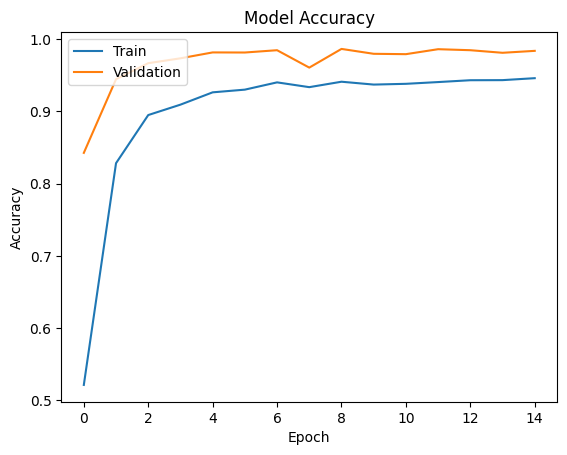

In [ ]:
#plotting graphs for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

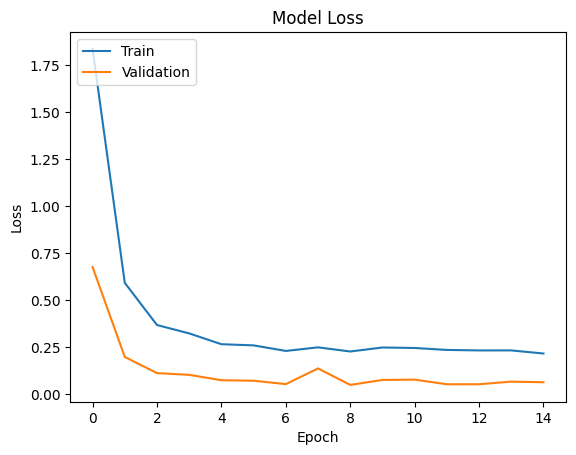

In [ ]:
#plotting graphs for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save('traffic_classifier.h5')

246/246 [==============================] - 1s 2ms/step
Accuracy =  0.958173935220607  Loss =  0.04182606477939301


AttributeError: ignored

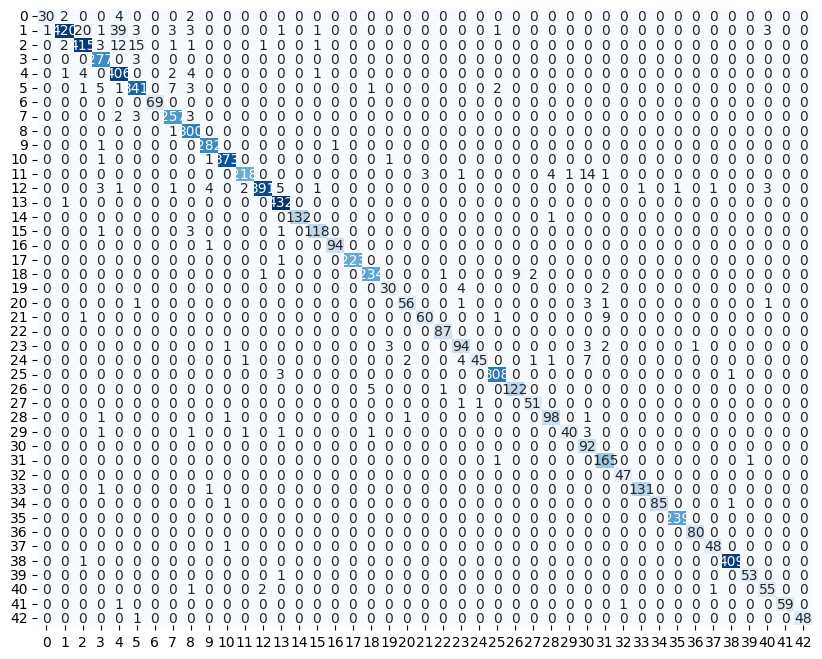

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the predicted classes from the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes for the test set
y_true = np.argmax(y_test, axis=1)

accuracy = np.sum(y_pred_classes == y_true) / len(y_true)
loss = np.sum(y_pred_classes != y_true) / len(y_true)
print("Accuracy = ",accuracy ," Loss = ", loss)

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False,ax=ax)
# ax.set_xtick()
ax.xlabel('Predicted Label')
ax.ylabel('True Label')
ax.show()
